<a href="https://colab.research.google.com/github/landges/automatic-octo-machine/blob/master/AuthorAnalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов определения авторства с использованием sklearn.

Задача: определение автора текста.

Модель: к-ближайших соседей.

Данные: 20 текстов, 5 авторов. Авторы: Толстой, Браун, Бредбери, Кинг, Ремарк.

In [82]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# Считывание данных
texts=[]
namefile=[]
directory='/content/drive/My Drive/Colab Notebooks/AuthorAnalizeCorpuse/'
files = os.listdir(directory)
for file in files:
  namefile.append(file)
  s=open(directory+file,'r')
  texts.append(s.read())
  s.close

In [0]:
# Формируем мешок слов
cv = CountVectorizer()
train=cv.fit_transform(texts)

In [0]:
# TfIDF
tfidf=TfidfVectorizer()
tfidf_cof=tfidf.fit_transform(texts)
train=tfidf_cof

In [87]:
# Обучение модельки
y=[1,2,3,3,4,3,2,2,5,4,1,5,1,5,5,3,1,2,4,4]
neib=KNeighborsClassifier()
neib.fit(train,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
# Делаем предсказание на тестовой выборке
test=neib.predict(train)
print(test)
# Выводим имена файлов, которые не попали
for i in range(len(test)):
  if test[i]!=y[i]:
    print (namefile[i])
print(y)
print(namefile)

[1 2 3 1 4 1 2 2 1 1 1 1 1 1 1 1 1 2 4 4]
King_Hunt.fb2
King_Kerry.fb2
avidreaders.ru__led-i-plamya.fb2
avidreaders.ru__kavkazskiy-plennik3.fb2
Bredbery_Mars.fb2
avidreaders.ru__451-za-farengeytom.fb2
Bredbery_Death.fb2
King_its.fb2
[1, 2, 3, 3, 4, 3, 2, 2, 5, 4, 1, 5, 1, 5, 5, 3, 1, 2, 4, 4]
['Remark_3tov.fb2', 'Braun_Origin.fb2', 'King_siyan.fb2', 'King_Hunt.fb2', 'avidreaders.ru__anna-karenina.txt', 'King_Kerry.fb2', 'Broun_Lost_Char.fb2', 'Broun_Angels_and_demons.fb2', 'avidreaders.ru__led-i-plamya.fb2', 'avidreaders.ru__kavkazskiy-plennik3.fb2', 'Remark_Triumf.fb2', 'Bredbery_Mars.fb2', 'Remark_Black.fb2', 'avidreaders.ru__451-za-farengeytom.fb2', 'Bredbery_Death.fb2', 'King_its.fb2', 'Remark_lifi.fb2', 'Braun_inferno.fb2', 'avidreaders.ru__voyna-i-mir-tom-1.txt', 'avidreaders.ru__voskresenie.fb2']


# Матрица ошибок

Confusion matrix, without normalization
[[4 0 0 0 0]
 [0 4 0 0 0]
 [3 0 1 0 0]
 [1 0 0 3 0]
 [4 0 0 0 0]]


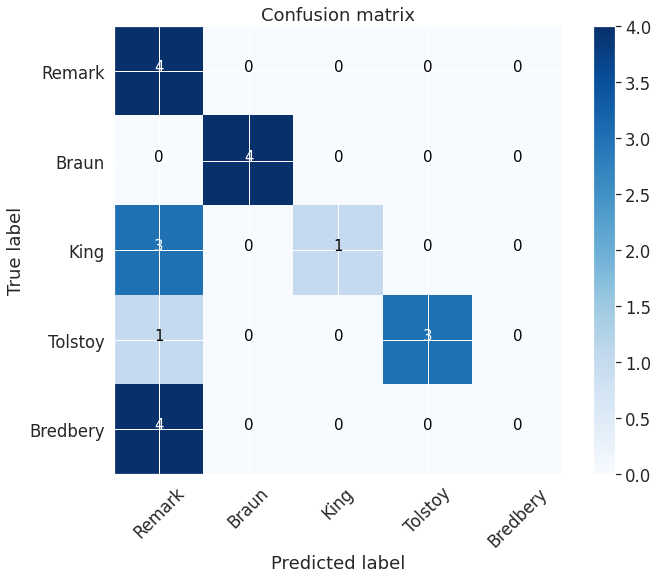

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y, test)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Remark', 'Braun','King','Tolstoy','Bredbery'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [90]:
report = classification_report(y, test, target_names=['Remark', 'Braun','King','Tolstoy','Bredbery'])
print(report)

              precision    recall  f1-score   support

      Remark       0.33      1.00      0.50         4
       Braun       1.00      1.00      1.00         4
        King       1.00      0.25      0.40         4
     Tolstoy       1.00      0.75      0.86         4
    Bredbery       0.00      0.00      0.00         4

    accuracy                           0.60        20
   macro avg       0.67      0.60      0.55        20
weighted avg       0.67      0.60      0.55        20



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Построение AUC-ROC кривой

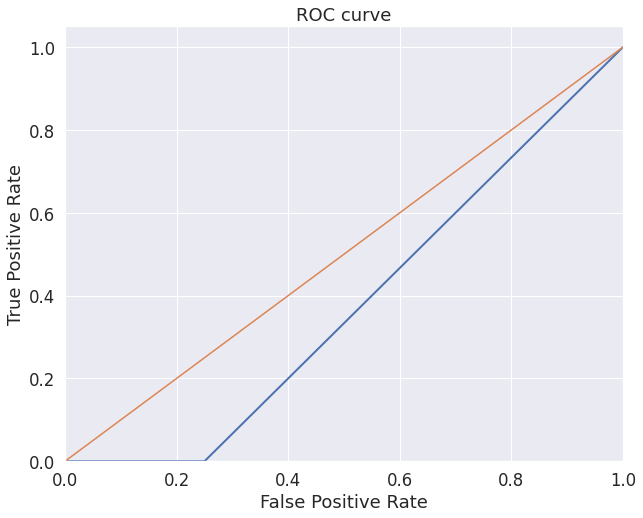

In [91]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y, neib.predict_proba(train)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()